In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (simularemos un DataFrame si no tienes un CSV)
# En un caso real, usarías: df = pd.read_csv('clientes.csv')
data = pd.read_csv('../../Data/perfilado.csv')
df = pd.DataFrame(data)


# Seleccionamos las características para la clusterización
X = df
X = X.fillna(0)

print("Primeras filas de los datos:")
print(X.head())

# Es una buena práctica escalar los datos, ya que K-Means se basa en distancias
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Primeras filas de los datos:
   numero_de_cliente  diferencia_active_quarter  diferencia_cliente_vip  \
0          989388730                          0                       0   
1          989470994                          0                       0   
2          989989133                         -1                       0   
3          991046429                          0                       0   
4          992159012                          0                       0   

   diferencia_internet  diferencia_cliente_edad  \
0                    0                        0   
1                    0                        0   
2                    0                        0   
3                    0                        0   
4                    0                        0   

   diferencia_cliente_antiguedad  diferencia_mrentabilidad  \
0                             -1                  -1580.74   
1                             -1                  -1185.67   
2                          

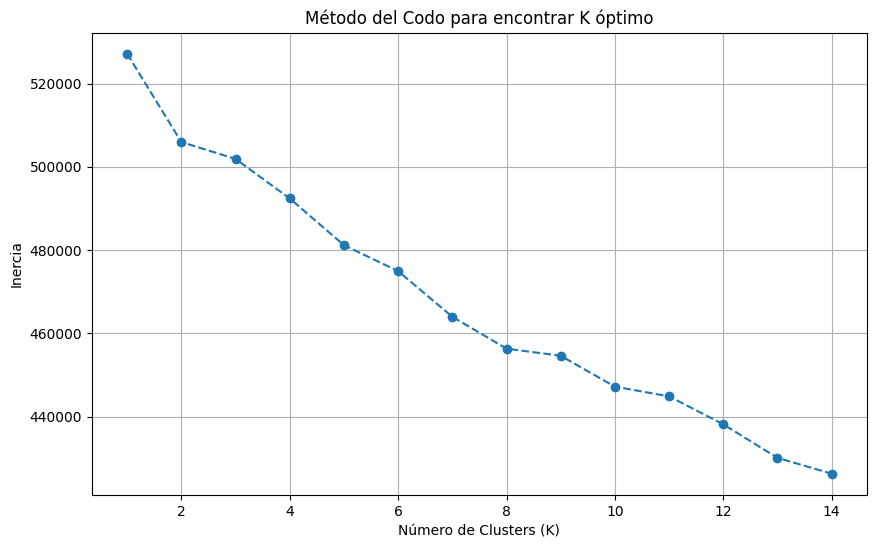

In [12]:
# Calcular la inercia para diferentes valores de K
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.title('Método del Codo para encontrar K óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [13]:
# Entrenar el modelo K-Means con el K óptimo
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Añadir la etiqueta del cluster a nuestro DataFrame original
df['Cluster'] = kmeans.labels_

print("\nPrimeras filas con el cluster asignado:")
print(df.head())


Primeras filas con el cluster asignado:
   numero_de_cliente  diferencia_active_quarter  diferencia_cliente_vip  \
0          989388730                          0                       0   
1          989470994                          0                       0   
2          989989133                         -1                       0   
3          991046429                          0                       0   
4          992159012                          0                       0   

   diferencia_internet  diferencia_cliente_edad  \
0                    0                        0   
1                    0                        0   
2                    0                        0   
3                    0                        0   
4                    0                        0   

   diferencia_cliente_antiguedad  diferencia_mrentabilidad  \
0                             -1                  -1580.74   
1                             -1                  -1185.67   
2              